(1800, 2)


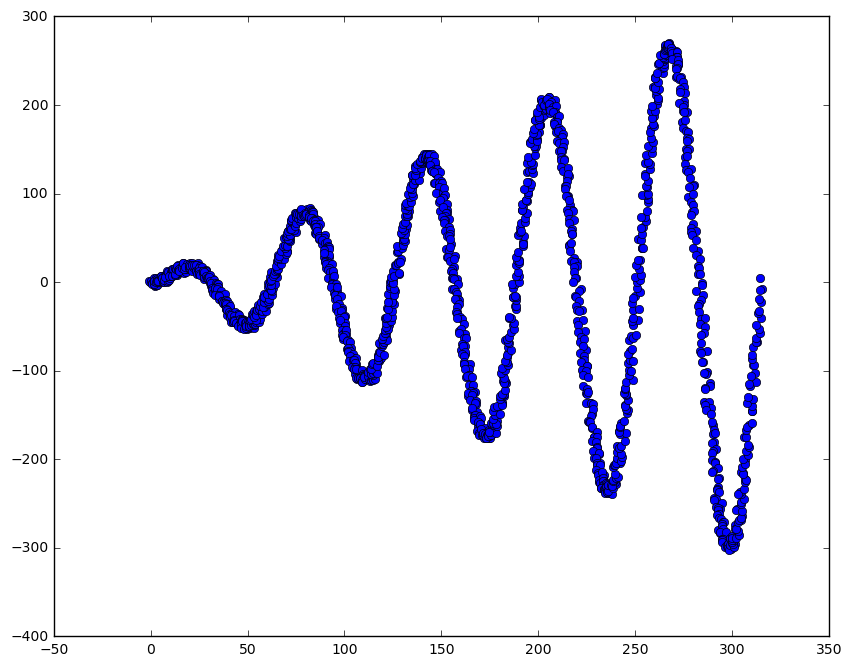

In [67]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 9/18/16 3:12 PM
# @Author  : Jackling 

import numpy as np

steps = 1800

x = np.linspace(0, 100 * np.pi, steps)

a = x + 4*(np.random.rand(steps)-0.5)
b = x * np.sin(x/10) + 10*(np.random.rand(steps)-0.5)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(a,b,'bo')

data = np.array(zip(a,b))
print data.shape
# 2d position

transition_matrices [[ 1.  0.]
 [ 0.  1.]]
observation_matrices [[ 1.  0.]
 [ 0.  1.]]
transition_covariance [[  1.00000000e-06   0.00000000e+00]
 [  0.00000000e+00   1.00000000e-06]]
observation_covariance [[ 0.01  0.  ]
 [ 0.    0.01]]
transition_offsets None
observation_offsets None
n_dim_state 2
n_dim_obs 2


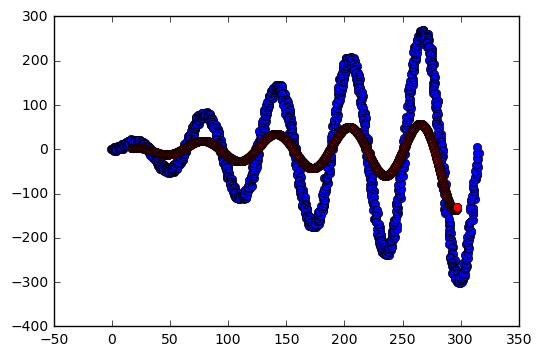

In [68]:
dim_observe = 2 # observe dim
dim_state = 2 # 2d velocity
A = np.eye(dim_state)
B = 0
u = 0
P = np.eye(dim_state)
K = np.zeros(dim_state)
H = np.eye(dim_state)
cQ = 0.000001
cR = 0.01
Q = np.eye(dim_state) * cQ
R = np.eye(dim_observe) * cR

from pykalman import KalmanFilter

"""Implements the Kalman Filter, Kalman Smoother, and EM algorithm.

    This class implements the Kalman Filter, Kalman Smoother, and EM Algorithm
    for a Linear Gaussian model specified by,

    .. math::

        x_{t+1}   &= A_{t} x_{t} + b_{t} + \\text{Normal}(0, Q_{t}) \\\\
        z_{t}     &= C_{t} x_{t} + d_{t} + \\text{Normal}(0, R_{t})

    The Kalman Filter is an algorithm designed to estimate
    :math:`P(x_t | z_{0:t})`.  As all state transitions and observations are
    linear with Gaussian distributed noise, these distributions can be
    represented exactly as Gaussian distributions with mean
    `filtered_state_means[t]` and covariances `filtered_state_covariances[t]`.

    Similarly, the Kalman Smoother is an algorithm designed to estimate
    :math:`P(x_t | z_{0:T-1})`.

    The EM algorithm aims to find for
    :math:`\\theta = (A, b, C, d, Q, R, \\mu_0, \\Sigma_0)`

    .. math::

        \\max_{\\theta} P(z_{0:T-1}; \\theta)

    If we define :math:`L(x_{0:T-1},\\theta) = \\log P(z_{0:T-1}, x_{0:T-1};
    \\theta)`, then the EM algorithm works by iteratively finding,

    .. math::

        P(x_{0:T-1} | z_{0:T-1}, \\theta_i)

    then by maximizing,

    .. math::

        \\theta_{i+1} = \\arg\\max_{\\theta}
            \\mathbb{E}_{x_{0:T-1}} [
                L(x_{0:T-1}, \\theta)| z_{0:T-1}, \\theta_i
            ]

    Parameters
    ----------
    transition_matrices : [n_timesteps-1, n_dim_state, n_dim_state] or \
    [n_dim_state,n_dim_state] array-like
        Also known as :math:`A`.  state transition matrix between times t and
        t+1 for t in [0...n_timesteps-2]
    observation_matrices : [n_timesteps, n_dim_obs, n_dim_obs] or [n_dim_obs, \
    n_dim_obs] array-like
        Also known as :math:`C`.  observation matrix for times
        [0...n_timesteps-1]
    transition_covariance : [n_dim_state, n_dim_state] array-like
        Also known as :math:`Q`.  state transition covariance matrix for times
        [0...n_timesteps-2]
    observation_covariance : [n_dim_obs, n_dim_obs] array-like
        Also known as :math:`R`.  observation covariance matrix for times
        [0...n_timesteps-1]
    transition_offsets : [n_timesteps-1, n_dim_state] or [n_dim_state] \
    array-like
        Also known as :math:`b`.  state offsets for times [0...n_timesteps-2]
    observation_offsets : [n_timesteps, n_dim_obs] or [n_dim_obs] array-like
        Also known as :math:`d`.  observation offset for times
        [0...n_timesteps-1]
    initial_state_mean : [n_dim_state] array-like
        Also known as :math:`\\mu_0`. mean of initial state distribution
    initial_state_covariance : [n_dim_state, n_dim_state] array-like
        Also known as :math:`\\Sigma_0`.  covariance of initial state
        distribution
    random_state : optional, numpy random state
        random number generator used in sampling
    em_vars : optional, subset of ['transition_matrices', \
    'observation_matrices', 'transition_offsets', 'observation_offsets', \
    'transition_covariance', 'observation_covariance', 'initial_state_mean', \
    'initial_state_covariance'] or 'all'
        if `em_vars` is an iterable of strings only variables in `em_vars`
        will be estimated using EM.  if `em_vars` == 'all', then all
        variables will be estimated.
    n_dim_state: optional, integer
        the dimensionality of the state space. Only meaningful when you do not
        specify initial values for `transition_matrices`, `transition_offsets`,
        `transition_covariance`, `initial_state_mean`, or
        `initial_state_covariance`.
    n_dim_obs: optional, integer
        the dimensionality of the observation space. Only meaningful when you
        do not specify initial values for `observation_matrices`,
        `observation_offsets`, or `observation_covariance`.
"""   
kf = KalmanFilter(transition_matrices = A, observation_matrices=H, transition_covariance=Q, observation_covariance=R)
res = kf.smooth(data)[0]

print '=========='
print 'transition_matrices',kf.transition_matrices 
print 'observation_matrices',kf.observation_matrices 
print 'transition_covariance',kf.transition_covariance 
print 'observation_covariance',kf.observation_covariance 
print 'transition_offsets',kf.transition_offsets 
print 'observation_offsets',kf.observation_offsets 
print 'n_dim_state',kf.n_dim_state 
print 'n_dim_obs',kf.n_dim_obs 
print '=========='

plt.figure()
plt.plot(data[:,0],data[:,1],'bo')
plt.plot(res[:,0],res[:,1],'ro')

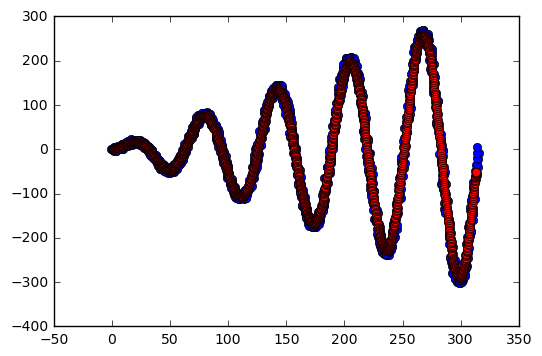

In [69]:
R = R *0.01

kf = KalmanFilter(transition_matrices = A, observation_matrices=H, transition_covariance=Q, observation_covariance=R)
res = kf.smooth(data)[0]

plt.figure()
plt.plot(data[:,0],data[:,1],'bo')
plt.plot(res[:,0],res[:,1],'ro')

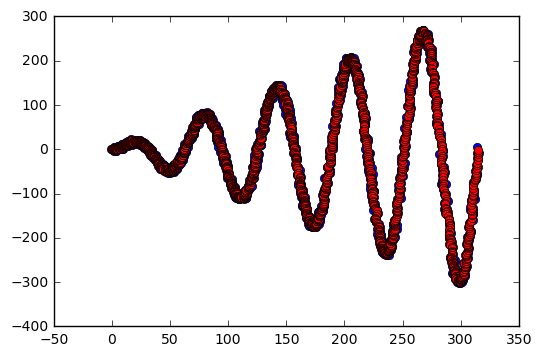

In [70]:
R = R *0.01

kf = KalmanFilter(transition_matrices = A, observation_matrices=H, transition_covariance=Q, observation_covariance=R)
res = kf.smooth(data)[0]

plt.figure()
plt.plot(data[:,0],data[:,1],'bo')
plt.plot(res[:,0],res[:,1],'ro')

transition_matrices [[1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]
 [0 0 0 1]]
observation_matrices [[1 0 0 0]
 [0 1 0 0]]
transition_covariance [[ 0.57379644  0.01767365  0.03555928  0.00896374]
 [ 0.01767365  1.44499579 -0.01496756 -0.07300085]
 [ 0.03555928 -0.01496756  0.14395253  0.00691387]
 [ 0.00896374 -0.07300085  0.00691387  0.34693093]]
observation_covariance [[ 1.03556922  0.104771  ]
 [ 0.104771    7.10421975]]
transition_offsets [ 0.  0.  0.  0.]
observation_offsets [ 0.  0.]
n_dim_state 4
n_dim_obs 2


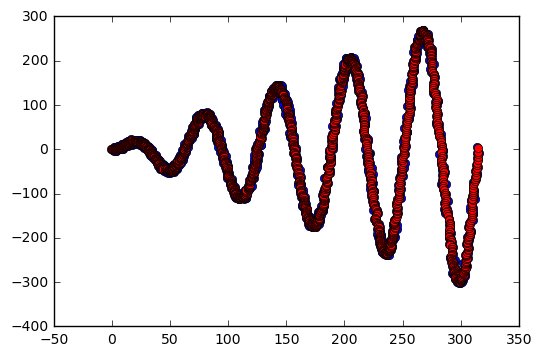

In [72]:
dim_observe = 2 # observe dim
dim_state = 4 # 2d velocity
A = np.eye(dim_state)
B = 0
u = 0
P = np.eye(dim_state)
K = np.zeros(dim_state)
H = np.eye(dim_observe)
cQ = 0.000001
cR = 0.01
Q = np.eye(dim_state) * cQ
R = np.eye(dim_observe) * cR


A = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]])
H = np.array([[1,0,0,0],[0,1,0,0]])


kf = KalmanFilter(transition_matrices = A, observation_matrices=H)
res = kf.em(data).smooth(data)[0] # em auto adjust covariance
print '=========='
print 'transition_matrices',kf.transition_matrices 
print 'observation_matrices',kf.observation_matrices 
print 'transition_covariance',kf.transition_covariance 
print 'observation_covariance',kf.observation_covariance 
print 'transition_offsets',kf.transition_offsets 
print 'observation_offsets',kf.observation_offsets 
print 'n_dim_state',kf.n_dim_state 
print 'n_dim_obs',kf.n_dim_obs 
print '=========='


plt.figure()
plt.plot(data[:,0],data[:,1],'bo')
plt.plot(res[:,0],res[:,1],'ro')